In [1]:
import dca_frustratometer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model=dca_frustratometer.AWSEMFrustratometer('data/1l63.pdb','A')

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


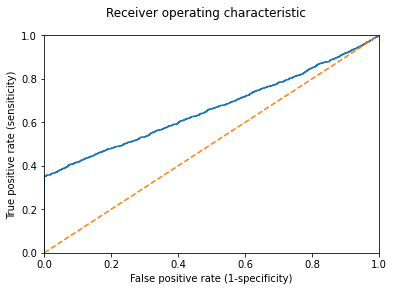

In [3]:
model.plot_roc()

In [4]:
print(model.auc())

0.6629650848653394


In [5]:
print(model.native_energy())

-914.9406872711635


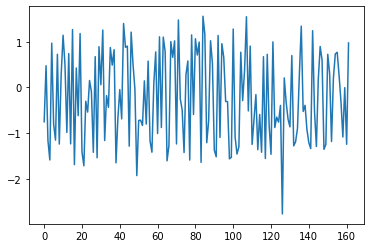

In [6]:
plt.plot(model.frustration('singleresidue'))

<AxesSubplot:>

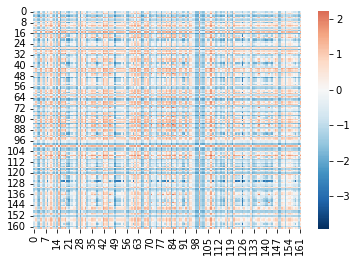

In [7]:
sns.heatmap(model.frustration('mutational'),cmap='RdBu_r',center=0)

<AxesSubplot:>

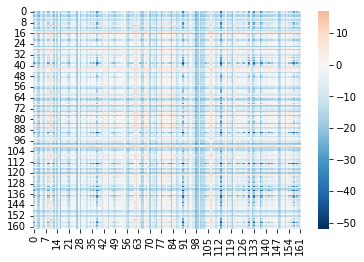

In [8]:
sns.heatmap(model.frustration('configurational'),cmap='RdBu_r',center=0)

/home/cb/Development/DCA_Frustratometer/dca_frustratometer/dca_frustratometer.py:506: RuntimeWarning: invalid value encountered in divide
  contact_frustration = -mean_energy / (std_energy + correction)


<AxesSubplot:>

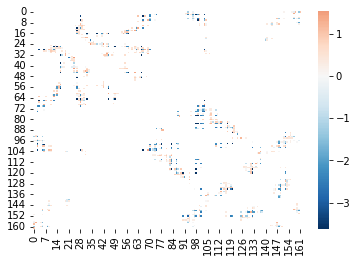

In [9]:
sns.heatmap(model.frustration('contact'),cmap='RdBu_r',center=0)

<AxesSubplot:>

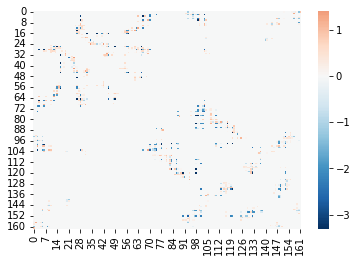

In [10]:
sns.heatmap(model.frustration('contact',correction=0.1),cmap='RdBu_r',center=0)

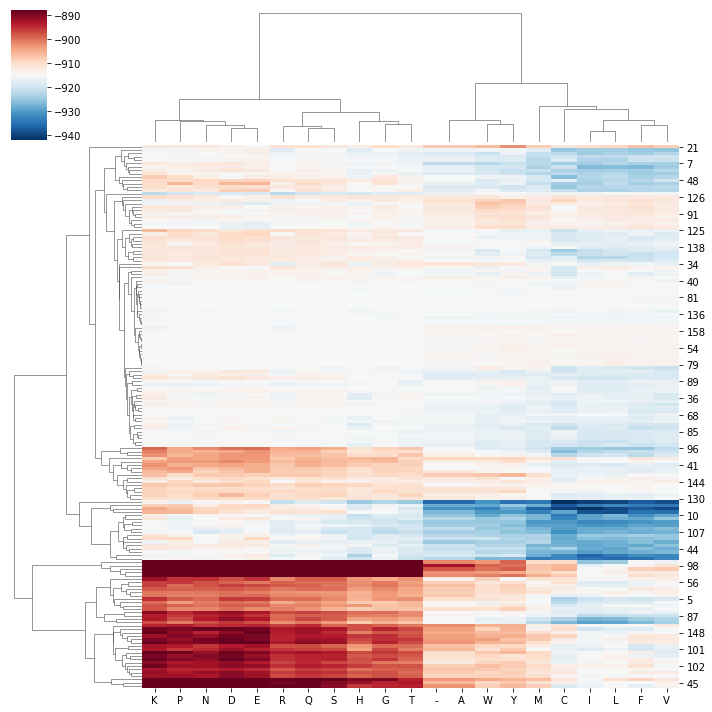

In [11]:
model.plot_decoy_energy('singleresidue')

In [12]:
#sns.clustermap(model.decoy_energy('mutational').reshape(-1,21*21))

In [13]:
model.decoy_fluctuation('singleresidue').mean()

2.3060725350615185

In [14]:
model.decoy_fluctuation('mutational').mean()

4.6033540612300765

In [15]:
model.decoy_fluctuation('contact').mean()

0.018060075284395866

In [16]:
model.vmd()

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


Info) VMD for LINUXAMD64, version 1.9.4a55 (October 19, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 12 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 116GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] NVIDIA GeForce RTX 3080 Ti 80 SM_8.6 1.7 GHz, 12GB RAM SP32 KT AE2 ZC
Info) OpenGL renderer: NVIDIA GeForce RTX 3080 Ti/PCIe/SSE2
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFGS) 
Info)   Full GLSL rendering mode is available.
Info)   Te

In [17]:
model.vmd(pair='contact',correction=0.1,max_connections=400)

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


Info) VMD for LINUXAMD64, version 1.9.4a55 (October 19, 2021)
Info) http://www.ks.uiuc.edu/Research/vmd/                         
Info) Email questions and bug reports to vmd@ks.uiuc.edu           
Info) Please include this reference in published work using VMD:   
Info)    Humphrey, W., Dalke, A. and Schulten, K., `VMD - Visual   
Info)    Molecular Dynamics', J. Molec. Graphics 1996, 14.1, 33-38.
Info) -------------------------------------------------------------
Info) Multithreading available, 12 CPUs, ISA dispatch enabled.
Info)   CPU features: SSE2 SSE4.1 AVX AVX2 FMA F16 HT 
Info) Free system memory: 116GB (91%)
Info) Creating CUDA device pool and initializing hardware...
Info) Detected 1 available CUDA accelerator::
Info) [0] NVIDIA GeForce RTX 3080 Ti 80 SM_8.6 1.7 GHz, 12GB RAM SP32 KT AE2 ZC
Info) OpenGL renderer: NVIDIA GeForce RTX 3080 Ti/PCIe/SSE2
Info)   Features: STENCIL MSAA(4) MDE CVA MTX NPOT PP PS GLSL(OVFGS) 
Info)   Full GLSL rendering mode is available.
Info)   Te